# Test d'hipòtesi

El nostre test d'hipòtesi vol respondre a la següent pregunta: Les companyies més grans (major 'Company Size') ofereixen sous més grans (max_Salary)?

Primer de tot hem de definir que és una companyia gran, així que segons les nostres dades tenim la següent distribució:

In [86]:
import pandas as pd
import numpy as np

In [87]:
df = pd.read_csv("job_offers_clean.csv")
df.head()

,Qualifications,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,min_Experience,max_Experience,min_Salary,max_Salary
0,M.Tech,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,...,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",5,15,59000,99000
1,BCA,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,...,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",2,12,56000,116000
2,PhD,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,...,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",0,12,61000,104000
3,PhD,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,...,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",4,11,65000,91000
4,MBA,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,...,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",1,12,64000,87000


Abans de començar amb l'anàlisi i preparació, eliminarem les files on Work Type sigui Part-Time, ja que les ofertes a mitja jornada tendran sous significativament més baixos i poden afectar a la normalitat de les dades. També ens centrarem en una posició concreta, la de Software Engineer, ja que com tenim vàries posicions de feina diferent, el rang salarial també pot variar molt entre diferents llocs de feina. Així que ens centrarem en ofertes a jornada completa (no tendrem en compte si es contracte temporal o indefinit) i que siguin de Software Engineer.

In [88]:
# Filtram el dataset per excloure les ofertes a mitja jornada
df_filtered = df[df['Work Type'] != 'Part-Time'].copy()
df_filtered = df_filtered[df_filtered['Job Title'] == 'Software Engineer'].copy()
df_filtered['Job Title']

23         Software Engineer
302        Software Engineer
332        Software Engineer
499        Software Engineer
506        Software Engineer
                 ...        
1610249    Software Engineer
1610253    Software Engineer
1610286    Software Engineer
1610404    Software Engineer
1610437    Software Engineer
Name: Job Title, Length: 22000, dtype: object

In [89]:
df_filtered["Company Size"].describe()

count     22000.000000
mean      73822.805909
std       35172.443982
min       12647.000000
25%       43301.250000
50%       73937.500000
75%      104146.000000
max      134830.000000
Name: Company Size, dtype: float64

Al nostre dataset tot són empreses 'grans', totes tenen com a mínim 12646 treballadors, la qual és una xifra considerable i podrien ser tot empreses multinacionals. El que farem per al nostre cas, és definir com empresa gran tota la que estigui al darrer quartil del nostre dataset, és a dir, que tingui més de 104299 treballadors. Ara que hem definit el llindar d'empresa gran, anem a formular les hipòtesi del test.

* Hipòtesi nul·la ($\mathbf{H_0}$) = No hi ha diferència significativa en el salari màxim mitjà (max_Salary) entre companyies grans (darrer quartil a Company Size) i companyies més petites amb un nivell de significació ($\alpha$) de 0.05.
* Hipòtesi alternativa ($\mathbf{H_1}$) = Les companyies més grans ofereixen un max_Salary major a les petites.

Com que estem comparant les mitjanes d'una variable numèrica (max_Salary) entre dos grups independents (empreses del darrer quartil vs. la resta), el test estadístic més adequat és el Test t de Student per a mostres independents. Anem a fer el codi per definir el llindar d'empresa gran i empresa petita.

In [90]:
# Definim llindar
large_company_threshold = 104146

# Cream una columna categòrica per definir si l'empresa o no en funció del nostre llindar
df_filtered["company_size_group"] = np.where(
    df_filtered["Company Size"] > large_company_threshold,
    "Gran",
    "Petita"
)

df_filtered[["Company Size", "max_Salary", "company_size_group"]]

,Company Size,max_Salary,company_size_group
23,127385,124000,Gran
302,74181,110000,Petita
332,105598,121000,Gran
499,126086,129000,Gran
506,83426,97000,Petita
...,...,...,...
1610249,91585,84000,Petita
1610253,112995,97000,Gran
1610286,26257,116000,Petita
1610404,125302,115000,Gran


In [91]:
# Definim dos dataframes amb els salaris, un amb les empreses grans i un altre per a les empreses petites
large_company = df_filtered[df_filtered['company_size_group'] == 'Gran']['max_Salary']
small_company = df_filtered[df_filtered['company_size_group'] == 'Petita']['max_Salary']

Ara hem de comprovar la normalitat de les dades, ja que és una condició necessària per aplicar el Test t de Student.

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

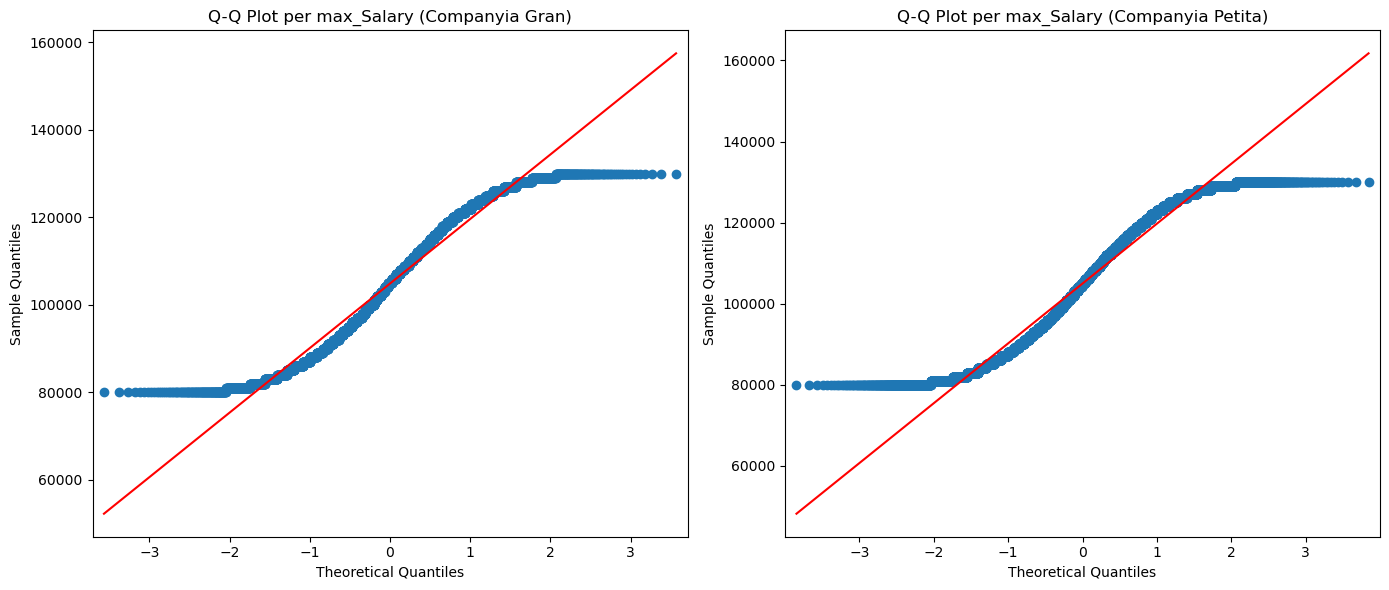

In [93]:
# Visualització amb Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sm.qqplot(large_company, line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot per max_Salary (Companyia Gran)')

sm.qqplot(small_company, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot per max_Salary (Companyia Petita)')

plt.tight_layout()
plt.show()

Com podem veure, gran part de les nostres dades segueixen una distribució normal, mentre que tenim valors extrems que es desvien d'aquesta tendència. Tot i això, degut al tamany del nostre dataset (22000 files) el test t d'Student és robust, ja que per a conjunt de dades més petits necessita de normalitat en les dades per garantir aquesta robustesa, però per conjunts grans de dades com el nostre el test és suficientment robust tot i no tenir una distribució normal perfecta en les dades.

Ara executarem el Test de Levenne per saber si les variàncies a max_Salary són iguals o diferents entre les empreses grans i petites. El resultat determinarà el test t de Student que aplicarem.

In [94]:
# Executam el test de Levene
# H0: Les variàncies són iguals (p-value > alpha)
# H1: Les variàncies són diferents (p-value <= alpha)

levene_test_result = stats.levene(large_company, small_company)
print(f"Resultats del Test de Levene per max_Salary (Software Engineer):")
print(f"  Estadístic: {levene_test_result.statistic:.3f}")
print(f"  Valor p: {levene_test_result.pvalue:.3f}")

Resultats del Test de Levene per max_Salary (Software Engineer):
  Estadístic: 0.009
  Valor p: 0.923


In [95]:
# Nivell de significació definit al principi
alpha = 0.05

if levene_test_result.pvalue > alpha:
    print(f"  Com que el p-value ({levene_test_result.pvalue:.3f}) > alpha ({alpha}), no rebutgem H0.")
    print("  Podem assumir que les variàncies són iguals.")
    equal_variances = True
else:
    print(f"  Com que el p-value ({levene_test_result.pvalue:.3f}) <= alpha ({alpha}), rebutgem H0.")
    print("  Les variàncies són significativament diferents.")
    equal_variances = False

  Com que el p-value (0.923) > alpha (0.05), no rebutgem H0.
  Podem assumir que les variàncies són iguals.


Com que el p-value (0.923) és molt més gran que el nostre nivell de significació α (0.05), no rebutgem la hipòtesi nul·la del Test de Levene. Això significa que podem assumir que les variàncies de max_Salary són iguals entre els grups d'empreses grans i petites per a les ofertes de 'Software Engineer'. Ara que sabem que podem assumir variàncies iguals, utilitzarem el test t de Student estàndard per a mostres independents.

In [96]:
# Realitzem el test t per a mostres independents, assumint variàncies iguals
t_stat, p_value_one_tailed = stats.ttest_ind(large_company, small_company, equal_var=True, alternative='greater')

print(f"\n--- Resultats del Test t de Student (Unilateral) ---")
print(f"Estadístic t: {t_stat:.3f}")
print(f"Valor p: {p_value_one_tailed:.3f}")
print(f"Nivell de significació (alpha): {alpha}")


--- Resultats del Test t de Student (Unilateral) ---
Estadístic t: -0.371
Valor p: 0.645
Nivell de significació (alpha): 0.05


In [97]:
print("\n--- Decisió del Test d'Hipòtesis ---")
if p_value_one_tailed <= alpha:
    print(f"Com que el p-value ({p_value_one_tailed:.3f}) <= alpha ({alpha}), REBUTGEM la Hipòtesi nul·la")
else:
    print(f"Com que el p-value ({p_value_one_tailed:.3f}) > alpha ({alpha}), NO REBUTGEM la Hipòtesi nul·la")


--- Decisió del Test d'Hipòtesis ---
Com que el p-value (0.645) > alpha (0.05), NO REBUTGEM la Hipòtesi nul·la


Com podem observar en els resultats, el p-value és major que alpha, per tant no rebutgem la hipòtesi nul·la. Això significa que no tenim evidència estadística significativa per afirmar que les companyies grans ofereixen sous majors que les companyies petites.